<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/India_Corona_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 1.4MB/s 
     |████████████████████████████████| 10.4MB 535kB/s 
     |████████████████████████████████| 14.7MB 34.1MB/s 


In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import re

In [0]:
shapefile1 = 'drive/My Drive/Data/India Map/Indian_States.shp'

In [0]:
gdf = gpd.read_file(shapefile1)

In [30]:
gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [0]:
latlong = pd.read_excel('drive/My Drive/Data/India Map/India Latlong.xlsx')

In [0]:
latlong['States'] = latlong['States'].apply(lambda x: re.split('[(]', x)[0].strip())

In [128]:
latlong.head()

,States,Latitude,Longitude
0,Andaman And Nicobar Island,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunanchal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,86.479973


In [0]:
cases = pd.read_excel('drive/My Drive/Data/India Map/India Cases.xlsx')

In [130]:
cases.head()

,STATE/UT,CONFIRMED,ACTIVE,RECOVERED,DECEASED
0,KERALA,6182,169,12,1
1,MAHARASHTRA,11167,138,25,4
2,KARNATAKA,1074,66,5,3
3,TELANGANA,665,64,1,-
4,UTTAR PRADESH,655,44,11,-


In [0]:
cases['STATE/UT'] = cases['STATE/UT'].str.title()

In [0]:
caseloc = latlong.merge(cases, how='left', left_on='States', right_on='STATE/UT').dropna(axis=0)

In [136]:
caseloc.head()

,States,Latitude,Longitude,STATE/UT,CONFIRMED,ACTIVE,RECOVERED,DECEASED
1,Andhra Pradesh,14.750429,78.570026,Andhra Pradesh,13.0,12.0,1,-
4,Bihar,25.785414,86.479973,Bihar,9.0,8.0,-,1
5,Chandigarh,30.719997,76.780006,Chandigarh,8.0,8.0,-,-
6,Chhattisgarh,22.090420,82.159987,Chhattisgarh,17.0,7.0,-,-
8,Goa,15.491997,73.818001,Goa,3.0,3.0,-,-


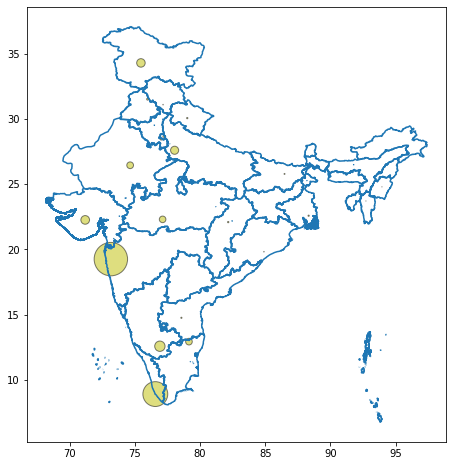

In [152]:
gdf.boundary.plot(figsize=(12,8))
plt.scatter(caseloc['Longitude'], caseloc['Latitude'], c='y', s=caseloc['CONFIRMED']/10, 
            linewidths=1, edgecolor='k', alpha=0.5)